In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [11]:
plt.style.use('seaborn-whitegrid')

In [10]:
from sklearn.model_selection import train_test_split

## Faringham Heart Study (FHS)

In [3]:
df = pd.read_csv("framMF.csv", header=0)
df.head()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,20,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,30,1,225,150.0,95.0,28.58,65,103,1
4,0,46,1,23,0,285,130.0,84.0,23.10,85,85,0


In [4]:
Y = df.TenYearCHD.values
df.drop("TenYearCHD", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           3709 non-null   int64  
 1   age            3709 non-null   int64  
 2   currentSmoker  3709 non-null   int64  
 3   cigsPerDay     3709 non-null   int64  
 4   prevalentHyp   3709 non-null   int64  
 5   totChol        3709 non-null   int64  
 6   sysBP          3709 non-null   float64
 7   diaBP          3709 non-null   float64
 8   BMI            3709 non-null   float64
 9   heartRate      3709 non-null   int64  
 10  glucose        3709 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 318.9 KB


In [6]:
data = (df-df.mean())/df.std()
data.describe()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03,3.709000e+03
mean,-7.279758e-17,1.647524e-16,-9.578629e-18,-2.394657e-17,-1.149436e-17,-1.652314e-16,-5.728020e-16,3.678194e-16,1.380472e-14,-4.406170e-16,1.570895e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.892182e-01,-2.051914e+00,-9.761538e-01,-7.557172e-01,-6.753518e-01,-2.801207e+00,-2.210878e+00,-2.909121e+00,-2.517027e+00,-2.655827e+00,-1.757534e+00
25%,-8.892182e-01,-8.862432e-01,-9.761538e-01,-7.557172e-01,-6.753518e-01,-6.984042e-01,-6.979024e-01,-6.605684e-01,-6.660565e-01,-6.473560e-01,-4.559785e-01
50%,-8.892182e-01,-7.027341e-02,-9.761538e-01,-7.557172e-01,-6.753518e-01,-6.530241e-02,-2.011045e-01,-7.761024e-02,-9.822900e-02,-6.155195e-02,-1.620789e-01
75%,1.124280e+00,7.456964e-01,1.024153e+00,9.210424e-01,1.480311e+00,5.904101e-01,5.215105e-01,5.886276e-01,5.507167e-01,5.242521e-01,2.157920e-01
max,1.124280e+00,2.377636e+00,1.024153e+00,5.112942e+00,1.480311e+00,8.210242e+00,7.341190e+00,4.960814e+00,7.625208e+00,5.629116e+00,1.310539e+01


In [7]:
dataset = data.values
X = dataset[:,:].astype(float)
X

array([[ 1.12428016, -1.23594455, -0.9761538 , ...,  0.29261328,
         0.35687948, -0.20406454],
       [-0.8892182 , -0.41997475, -0.9761538 , ...,  0.72524372,
         1.61217378, -0.24605019],
       [ 1.12428016, -0.18684052,  1.02415253, ..., -0.10806151,
        -0.06155195, -0.49796411],
       ...,
       [-0.8892182 ,  0.27942793, -0.9761538 , ..., -1.05935687,
         0.35687948,  1.05550505],
       [ 1.12428016, -1.11937743, -0.9761538 , ..., -0.0441502 ,
        -0.73104224, -0.4139928 ],
       [-0.8892182 , -1.23594455,  1.02415253, ..., -1.19701202,
         0.77531091, -0.07810758]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print (X.shape, X_train.shape, X_test.shape)
print (Y.shape, Y_train.shape, Y_test.shape)

(3709, 11) (2967, 11) (742, 11)
(3709,) (2967,) (742,)


In [12]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [13]:
fit = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/30
594/594 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8507 - val_loss: 0.4073 - val_accuracy: 0.8315
Epoch 2/30
594/594 [==============================] - 1s 1ms/step - loss: 0.3818 - accuracy: 0.8507 - val_loss: 0.4014 - val_accuracy: 0.8315
Epoch 3/30
594/594 [==============================] - 1s 1ms/step - loss: 0.3794 - accuracy: 0.8507 - val_loss: 0.4012 - val_accuracy: 0.8315
Epoch 4/30
594/594 [==============================] - 1s 1ms/step - loss: 0.3771 - accuracy: 0.8507 - val_loss: 0.4035 - val_accuracy: 0.8315
Epoch 5/30
594/594 [==============================] - 1s 1ms/step - loss: 0.3765 - accuracy: 0.8507 - val_loss: 0.4032 - val_accuracy: 0.8315
Epoch 6/30
594/594 [==============================] - 1s 1ms/step - loss: 0.3762 - accuracy: 0.8507 - val_loss: 0.4012 - val_accuracy: 0.8315
Epoch 7/30
594/594 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8507 - val_loss: 0.4013 - val_accuracy: 0.8315
Epoch 

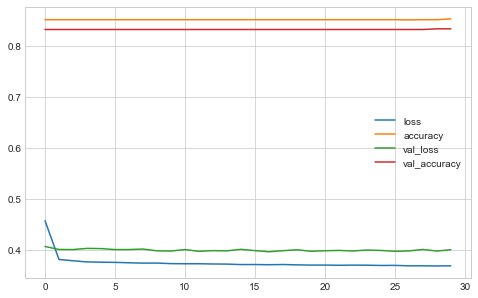

In [14]:
# shamelessly borrowed from https://stackoverflow.com/questions/48285129/saving-best-model-in-keras/48286003
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.show()

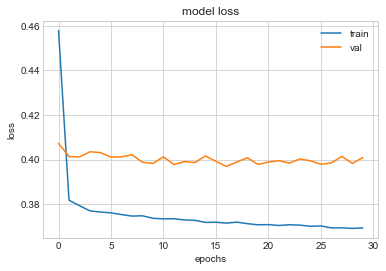

In [16]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

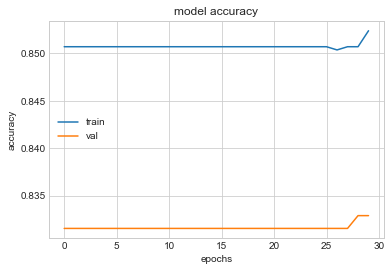

In [19]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='center left')
plt.show()

In [20]:
predTrain = np.round(model.predict(X_train), 0).astype('int64')
predTest = np.round(model.predict(X_test), 0).astype('int64')
predTrain = predTrain.reshape(-1)
predTest = predTest.reshape(-1)

In [21]:
confusion_matrix(Y_train, predTrain)

array([[2523,    1],
       [ 435,    8]], dtype=int64)

In [22]:
confusion_matrix(Y_test, predTest)

array([[617,   0],
       [124,   1]], dtype=int64)

So this is the issue: as the data set is unbalanced, the NN trains poorly, sensitivity is rubbish: of 125 people who would get ill, just 9 were identified. The same is demonstrated by other learning algorithms so I'll download and use for training under-sampled data sets:

In [23]:
df_train = pd.read_csv("FHStrainPCANorm.csv", header=0)
df_test = pd.read_csv("FHStestPCANorm.csv", header=0)

In [24]:
df_train.describe()

,male,age,education.1,education.2,education.3,education.4,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,PC1,PC2,PC3,label
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.070652,0.202904,0.068979,-0.045822,-0.044366,0.009942,0.046054,0.061944,0.094127,0.052757,0.114104,0.071331,0.060900,0.011100,0.155287,0.262275,0.020713,0.041782,0.500000
std,1.008215,1.007319,1.008379,0.978888,0.957487,1.012202,1.000147,1.041911,1.233580,1.318373,1.293435,1.027173,1.034957,0.984411,1.416218,1.678398,0.693951,0.508152,0.500243
min,-0.863443,-1.930344,-0.859808,-0.652444,-0.437940,-0.360904,-0.981162,-0.756154,-0.172460,-0.070962,-0.162222,-2.925639,-2.265783,-2.157149,-1.808957,-3.034642,-2.995928,-1.616158,0.000000
25%,-0.863443,-0.646224,-0.859808,-0.652444,-0.437940,-0.360904,-0.981162,-0.756154,-0.172460,-0.070962,-0.162222,-0.594740,-0.594268,-0.659186,-0.389278,-1.026025,-0.460452,-0.283964,0.000000
50%,-0.863443,0.170943,-0.859808,-0.652444,-0.437940,-0.360904,1.018899,-0.671788,-0.172460,-0.070962,-0.162222,-0.028988,-0.062868,-0.076645,-0.045113,-0.276988,-0.018443,0.008254,0.500000
75%,1.157812,1.104848,1.162708,1.532246,-0.437940,-0.360904,1.018899,0.931152,-0.172460,-0.070962,-0.162222,0.672545,0.620710,0.651532,0.213010,1.557666,0.507860,0.275722,1.000000
max,1.157812,2.388968,1.162708,1.532246,2.282743,2.770005,1.018899,5.149416,5.796752,14.087969,6.162573,8.230993,7.603765,4.084364,13.420325,7.681361,2.566875,2.767503,1.000000


In [25]:
Y = df_train.label.values
df_train.drop("label", axis=1, inplace=True)

In [26]:
dataset = df_train.values
X = dataset[:,:].astype(float)
X

array([[-0.86344318,  1.33832441, -0.85980764, ...,  1.86586043,
         0.47111527, -0.31026527],
       [-0.86344318,  1.5718007 ,  1.16270797, ..., -0.80224138,
        -0.04619287,  0.9269641 ],
       [-0.86344318, -0.41274782, -0.85980764, ..., -1.16137068,
        -0.12922497, -0.31973346],
       ...,
       [-0.86344318,  0.05420477,  1.16270797, ...,  0.97076687,
         1.16353173, -0.00916864],
       [ 1.15781236, -0.87970042, -0.85980764, ..., -1.95997992,
         0.61856395,  0.44161069],
       [-0.86344318,  0.63789551,  1.16270797, ..., -0.48066364,
        -0.52623118, -0.05768593]])

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
print (X.shape, X_train.shape, X_val.shape)
print (Y.shape, Y_train.shape, Y_val.shape)

(1030, 18) (824, 18) (206, 18)
(1030,) (824,) (206,)


In [28]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [29]:
fit = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, Y_val), shuffle=True)

Epoch 1/30
165/165 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6286 - val_loss: 0.6543 - val_accuracy: 0.6748
Epoch 2/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6893 - val_loss: 0.6143 - val_accuracy: 0.6845
Epoch 3/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.6930 - val_loss: 0.6054 - val_accuracy: 0.7039
Epoch 4/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.6905 - val_loss: 0.6051 - val_accuracy: 0.6942
Epoch 5/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7027 - val_loss: 0.6083 - val_accuracy: 0.6990
Epoch 6/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.6930 - val_loss: 0.6091 - val_accuracy: 0.7039
Epoch 7/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7027 - val_loss: 0.6146 - val_accuracy: 0.6990
Epoch 

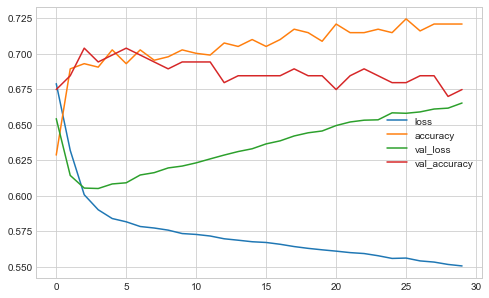

In [30]:
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.show()

In [31]:
from keras.callbacks import EarlyStopping

In [32]:
# borrowed from: https://stackoverflow.com/questions/48285129/saving-best-model-in-keras/48286003
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [33]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [34]:
fit = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, Y_val),
                callbacks=[early_stopping_monitor], shuffle=True)

Epoch 1/30
165/165 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6201 - val_loss: 0.6649 - val_accuracy: 0.6650
Epoch 2/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6723 - val_loss: 0.6195 - val_accuracy: 0.6699
Epoch 3/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.6857 - val_loss: 0.6062 - val_accuracy: 0.6893
Epoch 4/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6881 - val_loss: 0.6046 - val_accuracy: 0.7039
Epoch 5/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.6954 - val_loss: 0.6066 - val_accuracy: 0.7087


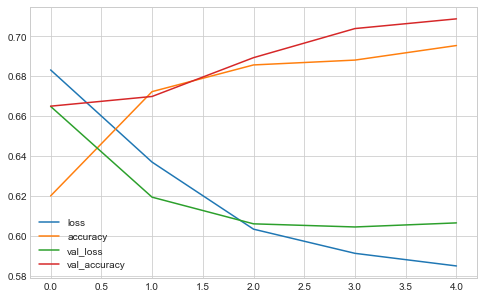

In [35]:
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.show()

In [36]:
predTrain = np.round(model.predict(X_train), 0).astype('int64')
predVal = np.round(model.predict(X_val), 0).astype('int64')

In [37]:
predTrain = predTrain.reshape(-1)
predVal = predVal.reshape(-1)

In [38]:
confusion_matrix(Y_train, predTrain)

array([[287, 130],
       [120, 287]], dtype=int64)

In [39]:
# train accurcy:
np.sum(predTrain == Y_train)/len(Y_train)

0.6966019417475728

In [40]:
confusion_matrix(Y_val, predVal)

array([[68, 30],
       [31, 77]], dtype=int64)

In [41]:
# test/ valod. accurcy:
np.sum(predVal == Y_val)/len(Y_val)

0.7038834951456311

In [42]:
Y_test = df_test.label.values
df_test.drop("label", axis=1, inplace=True)

In [43]:
dataset = df_test.values
X_test = dataset[:,:].astype(float)

In [44]:
predTest = np.round(model.predict(X_test), 0).astype('int64')

In [45]:
predTest = predTest.reshape(-1)

In [46]:
confusion_matrix(Y_test, predTest)

array([[453, 266],
       [ 42,  87]], dtype=int64)

In [47]:
# test accurcy:
np.sum(predTest == Y_test)/len(Y_test)

0.6367924528301887

In [48]:
# sensitivity
87/(42+87)

0.6744186046511628

In [49]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [50]:
#run time of training:
import time
start = time.time()
fit = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, Y_val),
                callbacks=[early_stopping_monitor], shuffle=True)
finish = time.time()

Epoch 1/30
165/165 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6117 - val_loss: 0.6477 - val_accuracy: 0.6748
Epoch 2/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.6687 - val_loss: 0.6188 - val_accuracy: 0.6796
Epoch 3/30
165/165 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6869 - val_loss: 0.6067 - val_accuracy: 0.7039
Epoch 4/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6893 - val_loss: 0.6052 - val_accuracy: 0.6990
Epoch 5/30
165/165 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6893 - val_loss: 0.6085 - val_accuracy: 0.6942


In [51]:
finish-start

1.4923062324523926

In [52]:
start = time.time()
predTest = np.round(model.predict(X_test), 0).astype('int64')
finish = time.time()

In [53]:
finish-start

0.06180834770202637

## Cleveland Data Base (CDB)

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv("cardio.csv", header=0)
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,opz,age
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,63
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,37
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,41
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,56
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,57


In [4]:
df['cp'] = df.cp.astype('category')
df['ca'] = df.ca.astype('category')
df['thal'] = df.thal.astype('category')
df['slope'] = df.slope.astype('category')

In [5]:
# borrowed from https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [6]:
df1 = one_hot(df, ['cp', 'ca', 'slope', 'thal'])
df1.drop(['cp', 'ca', 'slope', 'thal'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       296 non-null    int64  
 1   trestbps  296 non-null    int64  
 2   chol      296 non-null    int64  
 3   fbs       296 non-null    int64  
 4   restecg   296 non-null    int64  
 5   thalach   296 non-null    int64  
 6   exang     296 non-null    int64  
 7   oldpeak   296 non-null    float64
 8   target    296 non-null    int64  
 9   opz       296 non-null    int64  
 10  age       296 non-null    int64  
 11  cp_0      296 non-null    uint8  
 12  cp_1      296 non-null    uint8  
 13  cp_2      296 non-null    uint8  
 14  cp_3      296 non-null    uint8  
 15  ca_0      296 non-null    uint8  
 16  ca_1      296 non-null    uint8  
 17  ca_2      296 non-null    uint8  
 18  ca_3      296 non-null    uint8  
 19  slope_0   296 non-null    uint8  
 20  slope_1   296 non-null    uint8 

In [8]:
Y = df1.target.values
df1.drop("target", axis=1, inplace=True)

In [9]:
df_trainZ, df_test, y_trainZ, y_test = train_test_split(df1, Y, test_size=0.17, random_state=1, shuffle = True)
df_train, df_val, y_train, y_val = train_test_split(df_trainZ, y_trainZ, test_size=0.2, random_state=1, shuffle = True)

In [11]:
# normalize:
df_train = (df_train-df_trainZ.mean())/df_trainZ.std()
df_test = (df_test-df_trainZ.mean())/df_trainZ.std()
df_val = (df_val-df_trainZ.mean())/df_trainZ.std()

In [12]:
df_train.describe()

,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,opz,age,...,ca_0,ca_1,ca_2,ca_3,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,-0.017488,0.002713,0.034145,-0.002946,-0.017245,-0.038934,0.048259,-0.004912,-0.034858,0.058906,...,-3.851794e-17,-0.004946,-0.026015,0.042476,-0.018596,0.073645,-0.063289,0.021238,-0.030866,0.021123
std,1.007173,1.031999,1.064796,0.997418,0.997208,0.985562,1.018536,0.965498,0.986530,0.970241,...,1.000513e+00,0.997078,0.967150,1.074788,0.971429,1.004742,0.994067,1.038533,1.004493,1.006100
min,-1.460235,-2.121354,-2.242156,-0.400599,-0.965709,-3.438444,-0.675620,-0.898973,-0.688448,-2.758885,...,-1.253995e+00,-0.524323,-0.351209,-0.254855,-0.297533,-0.908283,-0.930955,-0.254855,-1.152342,-0.760444
25%,-1.460235,-0.650469,-0.713907,-0.400599,-0.965709,-0.784540,-0.675620,-0.898973,-0.688448,-0.685490,...,-1.253995e+00,-0.524323,-0.351209,-0.254855,-0.297533,-0.908283,-0.930955,-0.254855,-1.152342,-0.760444
50%,0.682026,-0.084743,-0.111020,-0.400599,-0.965709,0.085593,-0.675620,-0.223364,-0.688448,0.187519,...,7.941966e-01,-0.524323,-0.351209,-0.254855,-0.297533,-0.908283,-0.930955,-0.254855,0.864256,-0.760444
75%,0.682026,0.480982,0.585337,-0.400599,0.912059,0.651179,1.474080,0.452244,1.446613,0.733149,...,7.941966e-01,-0.524323,-0.351209,-0.254855,-0.297533,1.096485,1.069782,-0.254855,0.864256,1.309654
max,0.682026,3.422754,5.945891,2.486072,2.789826,2.260924,1.474080,3.830286,1.446613,2.479166,...,7.941966e-01,1.899435,2.835687,3.907780,3.347250,1.096485,1.069782,3.907780,0.864256,1.309654


In [13]:
X_train = df_train.values[:,:].astype(float)

In [14]:
X_test = df_test.values[:,:].astype(float)
X_val = df_val.values[:,:].astype(float)

In [15]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [17]:
fit = model.fit(X_train, y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/30
40/40 [==============================] - 0s 7ms/step - loss: 0.6681 - accuracy: 0.7602 - val_loss: 0.6559 - val_accuracy: 0.7551
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.8316 - val_loss: 0.5999 - val_accuracy: 0.7959
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.8469 - val_loss: 0.5190 - val_accuracy: 0.7959
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.8622 - val_loss: 0.4491 - val_accuracy: 0.7959
Epoch 5/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8571 - val_loss: 0.4115 - val_accuracy: 0.7959
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8622 - val_loss: 0.3900 - val_accuracy: 0.8163
Epoch 7/30
40/40 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8724 - val_loss: 0.3825 - val_accuracy: 0.8163
Epoch 8/30
40/40 [==

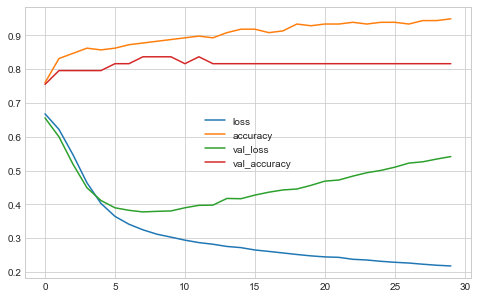

In [18]:
# borrowed from https://stackoverflow.com/questions/48285129/saving-best-model-in-keras/48286003
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.show()

In [19]:
from keras.callbacks import EarlyStopping
# borrowed from: https://stackoverflow.com/questions/48285129/saving-best-model-in-keras/48286003
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [31]:
#run time of training:
import time
start = time.time()
fit = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_data=(X_val, y_val),
                callbacks=[early_stopping_monitor], verbose=1, shuffle=True)
finish = time.time()

Epoch 1/30
40/40 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8878 - val_loss: 0.3723 - val_accuracy: 0.8367
Epoch 2/30
40/40 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8878 - val_loss: 0.3736 - val_accuracy: 0.8367


In [32]:
finish-start

0.1854839324951172

In [34]:
predTrain = np.round(model.predict(X_train), 0).astype('int64')
predVal = np.round(model.predict(X_val), 0).astype('int64')

In [33]:
start = time.time()
predTest = np.round(model.predict(X_test), 0).astype('int64')
finish = time.time()
finish-start

0.026927947998046875

In [35]:
predTrain = predTrain.reshape(-1)
predVal = predVal.reshape(-1)
predTest = predTest.reshape(-1)

In [36]:
# train accurcy:
np.sum(predTrain == y_train)/len(y_train)

0.8877551020408163

In [37]:
# valid. accurcy:
np.sum(predVal == y_val)/len(y_val)

0.8367346938775511

In [38]:
# test accurcy:
np.sum(predTest == y_test)/len(y_test)

0.8235294117647058

In [39]:
confusion_matrix(y_train, predTrain)

array([[81, 13],
       [ 9, 93]], dtype=int64)

In [40]:
confusion_matrix(y_val, predVal)

array([[11,  3],
       [ 5, 30]], dtype=int64)

In [41]:
confusion_matrix(y_test, predTest)

array([[24,  4],
       [ 5, 18]], dtype=int64)

## Influence of training set size

#### CDB

In [42]:
df = pd.read_csv("cardio.csv", header=0)
df['cp'] = df.cp.astype('category')
df['ca'] = df.ca.astype('category')
df['thal'] = df.thal.astype('category')
df['slope'] = df.slope.astype('category')
df1 = one_hot(df, ['cp', 'ca', 'slope', 'thal'])
df1.drop(['cp', 'ca', 'slope', 'thal'], axis=1, inplace=True)
Y = df1.target.values
df1.drop("target", axis=1, inplace=True)
df_trainZ, df_test, y_trainZ, y_test = train_test_split(df1, Y, test_size=0.17, random_state=1, shuffle = True)

In [43]:
df_test = (df_test-df_trainZ.mean())/df_trainZ.std()
df_trainZ = (df_trainZ-df_trainZ.mean())/df_trainZ.std()
XZ_train = df_trainZ.values[:,:].astype(float)
X_test = df_test.values[:,:].astype(float)

In [44]:
df_train20, _, y_train20, _ = train_test_split(XZ_train, y_trainZ, test_size=0.8, random_state=1, shuffle = True)
df_train40, _, y_train40, _ = train_test_split(XZ_train, y_trainZ, test_size=0.6, random_state=1, shuffle = True)
df_train60, _, y_train60, _ = train_test_split(XZ_train, y_trainZ, test_size=0.4, random_state=1, shuffle = True)
df_train80, _, y_train80, _ = train_test_split(XZ_train, y_trainZ, test_size=0.2, random_state=1, shuffle = True)

In [45]:
model = Sequential()
model.add(Dense(16, input_dim=XZ_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fitZ = model.fit(XZ_train, y_trainZ, epochs=30, batch_size=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
49/49 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6082 - val_loss: 0.6672 - val_accuracy: 0.7843
Epoch 2/30
49/49 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.8163 - val_loss: 0.5775 - val_accuracy: 0.8627
Epoch 3/30
49/49 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8449 - val_loss: 0.4552 - val_accuracy: 0.8627
Epoch 4/30
49/49 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8408 - val_loss: 0.3829 - val_accuracy: 0.8431
Epoch 5/30
49/49 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8449 - val_loss: 0.3448 - val_accuracy: 0.8235
Epoch 6/30
49/49 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8571 - val_loss: 0.3318 - val_accuracy: 0.8235
Epoch 7/30
49/49 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8612 - val_loss: 0.3250 - val_accuracy: 0.8235
Epoch 8/30
49/49 [==

In [46]:
model = Sequential()
model.add(Dense(16, input_dim=XZ_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit20 = model.fit(df_train20, y_train20, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, y_test))

In [47]:
model = Sequential()
model.add(Dense(16, input_dim=XZ_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit40 = model.fit(df_train40, y_train40, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, y_test))

In [48]:
model = Sequential()
model.add(Dense(16, input_dim=XZ_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit60 = model.fit(df_train60, y_train60, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, y_test))

In [49]:
model = Sequential()
model.add(Dense(16, input_dim=XZ_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit80 = model.fit(df_train80, y_train80, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, y_test))

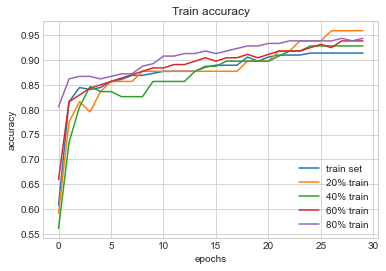

In [50]:
plt.plot(fitZ.history['accuracy'], label="train set")
plt.plot(fit20.history['accuracy'], label="20% train")
plt.plot(fit40.history['accuracy'], label="40% train")
plt.plot(fit60.history['accuracy'], label="60% train")
plt.plot(fit80.history['accuracy'], label="80% train")
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()

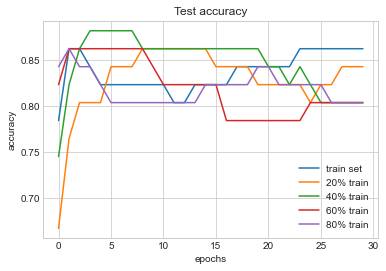

In [51]:
plt.plot(fitZ.history['val_accuracy'],  label="train set")
plt.plot(fit20.history['val_accuracy'],  label="20% train")
plt.plot(fit40.history['val_accuracy'],  label="40% train")
plt.plot(fit60.history['val_accuracy'],  label="60% train")
plt.plot(fit80.history['val_accuracy'],  label="80% train")
plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()

As for me, the loss dependence on the training set size is more revealing:

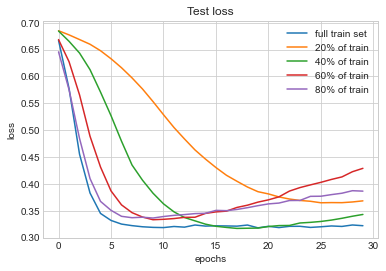

In [52]:
plt.plot(fitZ.history['val_loss'], label="full train set")
plt.plot(fit20.history['val_loss'], label="20% of train")
plt.plot(fit40.history['val_loss'], label="40% of train")
plt.plot(fit60.history['val_loss'], label="60% of train")
plt.plot(fit80.history['val_loss'], label="80% of train")
plt.title('Test loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

#### FHS

But before let's train the NN with a different l.r. than Adam's default l.r.=0.001

We were specidically asked to use a different learning rate. Adam optimizer uses default l.r. = 0.001. Let's change it to 0.1.

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df_train = pd.read_csv("FHStrainPCANorm.csv", header=0)
df_test = pd.read_csv("FHStestPCANorm.csv", header=0)

In [3]:
Y = df_train.label.values
df_train.drop("label", axis=1, inplace=True)

In [4]:
dataset = df_train.values
X = dataset[:,:].astype(float)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
print (X.shape, X_train.shape, X_val.shape)
print (Y.shape, Y_train.shape, Y_val.shape)

(1030, 18) (824, 18) (206, 18)
(1030,) (824,) (206,)


In [6]:
# from https://stackoverflow.com/questions/59737875/keras-change-learning-rate
import keras
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
optimizer = keras.optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                304       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import EarlyStopping

In [8]:
# borrowed from: https://stackoverflow.com/questions/48285129/saving-best-model-in-keras/48286003
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [9]:
fit = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, Y_val),
                callbacks=[early_stopping_monitor], shuffle=True)

Epoch 1/30
165/165 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.5740 - val_loss: 1.2455 - val_accuracy: 0.6456
Epoch 2/30
165/165 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6432 - val_loss: 0.9263 - val_accuracy: 0.6505
Epoch 3/30
165/165 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6250 - val_loss: 0.9750 - val_accuracy: 0.6602


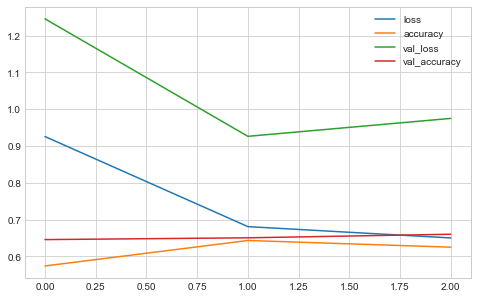

In [10]:
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.show()

In [11]:
predTrain = np.round(model.predict(X_train), 0).astype('int64')
predVal = np.round(model.predict(X_val), 0).astype('int64')
predTrain = predTrain.reshape(-1)
predVal = predVal.reshape(-1)
Y_test = df_test.label.values
df_test.drop("label", axis=1, inplace=True)

In [12]:
# train accurcy:
np.sum(predTrain == Y_train)/len(Y_train)

0.6504854368932039

In [13]:
# valid. accurcy:
np.sum(predVal == Y_val)/len(Y_val)

0.6504854368932039

In [14]:
dataset = df_test.values
X_test = dataset[:,:].astype(float)

In [15]:
predTest = np.round(model.predict(X_test), 0).astype('int64')
predTest = predTest.reshape(-1)

In [16]:
confusion_matrix(Y_test, predTest)

array([[279, 440],
       [ 24, 105]], dtype=int64)

In [17]:
# test accurcy:
np.sum(predTest == Y_test)/len(Y_test)

0.4528301886792453

Test set accuracy with default l.r.(0.001) in Adam optimizer was 62,7% now (with l.r.=0.1) it became 45.3%.

### Influence of training set size FHS

In [18]:
df_train = pd.read_csv("FHStrainPCANorm.csv", header=0)
Y = df_train.label.values
df_train.drop("label", axis=1, inplace=True)

In [19]:
df_train20, _, y_train20, _ = train_test_split(df_train, Y, test_size=0.8, random_state=1, shuffle = True)
df_train40, _, y_train40, _ = train_test_split(df_train, Y, test_size=0.6, random_state=1, shuffle = True)
df_train60, _, y_train60, _ = train_test_split(df_train, Y, test_size=0.4, random_state=1, shuffle = True)
df_train80, _, y_train80, _ = train_test_split(df_train, Y, test_size=0.2, random_state=1, shuffle = True)

In [20]:
X_train = df_train.values[:,:].astype(float)
X_train20 = df_train20.values[:,:].astype(float)
X_train40 = df_train40.values[:,:].astype(float)
X_train60 = df_train60.values[:,:].astype(float)
X_train80 = df_train80.values[:,:].astype(float)

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(X_train, Y, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, Y_test), shuffle=True)

In [22]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit80 = model.fit(X_train80, y_train80, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, Y_test), shuffle=True)

In [23]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit60 = model.fit(X_train60, y_train60, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, Y_test), shuffle=True)

In [24]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit40 = model.fit(X_train40, y_train40, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, Y_test), shuffle=True)

In [25]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit20 = model.fit(X_train20, y_train20, epochs=30, batch_size=5, verbose=0, validation_data=(X_test, Y_test), shuffle=True)

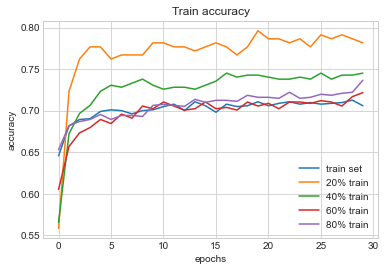

In [26]:
plt.plot(fit.history['accuracy'], label="train set")
plt.plot(fit20.history['accuracy'], label="20% train")
plt.plot(fit40.history['accuracy'], label="40% train")
plt.plot(fit60.history['accuracy'], label="60% train")
plt.plot(fit80.history['accuracy'], label="80% train")
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()

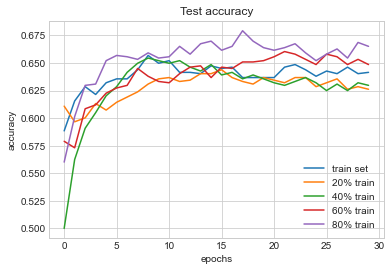

In [27]:
plt.plot(fit.history['val_accuracy'],  label="train set")
plt.plot(fit20.history['val_accuracy'],  label="20% train")
plt.plot(fit40.history['val_accuracy'],  label="40% train")
plt.plot(fit60.history['val_accuracy'],  label="60% train")
plt.plot(fit80.history['val_accuracy'],  label="80% train")
plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()

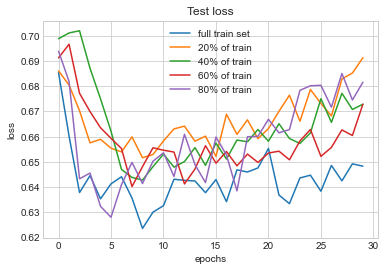

In [28]:
plt.plot(fit.history['val_loss'], label="full train set")
plt.plot(fit20.history['val_loss'], label="20% of train")
plt.plot(fit40.history['val_loss'], label="40% of train")
plt.plot(fit60.history['val_loss'], label="60% of train")
plt.plot(fit80.history['val_loss'], label="80% of train")
plt.title('Test loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper center')
plt.show()